In [95]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import descartes
import matplotlib.pyplot as plt
import matplotlib.colors
from shapely.geometry import Point, Polygon


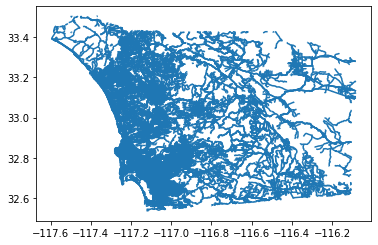

In [96]:
street_map = gpd.read_file('../mapData/tl_2019_06073_roads.shp')
street_map.plot()

In [97]:
df = pd.read_csv('../datasets/accidents-oci.csv')
df


,Unnamed: 0,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,lat,lng,oci
0,0,171594,2017-02-24 13:05:00,626,900,W,WASHINGTON,STREET,,,,22350,VC,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,MISDEMEANOR,32.750509,-117.156125,90.000
1,1,171688,2017-02-24 13:13:00,527,900,W,IVY,STREET,,,,22106,VC,STARTING PARKED VEHICLES OR BACKING,0,0,NaN,32.727097,-117.170710,98.000
2,2,181688,2017-02-24 13:27:00,124,5900,,SOLEDAD MTN,ROAD,,,,22106,VC,STARTING PARKED VEHICLES OR BACKING,0,0,NaN,32.826666,-117.240913,88.320
3,3,171615,2017-02-24 13:30:00,315,2100,,FENTON,PARKWAY,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,1,0,NaN,32.779007,-117.127047,55.372
4,4,171813,2017-02-24 13:40:00,325,6400,,CIBOLA,ROAD,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,32.804140,-117.053921,61.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27245,27245,19205512,2019-11-11 17:18:00,242,9500,,GOLD COAST,DRIVE,,,,22350,VC,UNSAFE SPEED (BASIC SPEED LAW) (I),1,0,NaN,32.905358,-117.120505,68.686
27246,27246,19205516,2019-11-11 19:10:00,434,8500,,POTRERO,STREET,,,,22107,VC,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),0,0,MISDEMEANOR,32.714895,-117.023198,71.576
27247,27247,19205514,2019-11-11 19:18:00,112,4200,,GENESEE,AVENUE,,,,21456B,VC,PEDESTRIAN CROSS AGAINST NO WALK SIGN/SIGNAL (I),1,0,NaN,32.819389,-117.182037,54.116
27248,27248,19205515,2019-11-11 19:55:00,432,300,,THRUSH,STREET,,,,22107,VC,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),0,0,MISDEMEANOR,32.707621,-117.072211,91.616


In [98]:
indexNames = df[ (df['lat'] < 31) | (df['lat'] > 34) | (df['lng'] > -116) | (df['lng'] < -118) ].index
df.drop(indexNames , inplace=True)
df

,Unnamed: 0,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,lat,lng,oci
0,0,171594,2017-02-24 13:05:00,626,900,W,WASHINGTON,STREET,,,,22350,VC,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,MISDEMEANOR,32.750509,-117.156125,90.000
1,1,171688,2017-02-24 13:13:00,527,900,W,IVY,STREET,,,,22106,VC,STARTING PARKED VEHICLES OR BACKING,0,0,NaN,32.727097,-117.170710,98.000
2,2,181688,2017-02-24 13:27:00,124,5900,,SOLEDAD MTN,ROAD,,,,22106,VC,STARTING PARKED VEHICLES OR BACKING,0,0,NaN,32.826666,-117.240913,88.320
3,3,171615,2017-02-24 13:30:00,315,2100,,FENTON,PARKWAY,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,1,0,NaN,32.779007,-117.127047,55.372
4,4,171813,2017-02-24 13:40:00,325,6400,,CIBOLA,ROAD,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,32.804140,-117.053921,61.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27245,27245,19205512,2019-11-11 17:18:00,242,9500,,GOLD COAST,DRIVE,,,,22350,VC,UNSAFE SPEED (BASIC SPEED LAW) (I),1,0,NaN,32.905358,-117.120505,68.686
27246,27246,19205516,2019-11-11 19:10:00,434,8500,,POTRERO,STREET,,,,22107,VC,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),0,0,MISDEMEANOR,32.714895,-117.023198,71.576
27247,27247,19205514,2019-11-11 19:18:00,112,4200,,GENESEE,AVENUE,,,,21456B,VC,PEDESTRIAN CROSS AGAINST NO WALK SIGN/SIGNAL (I),1,0,NaN,32.819389,-117.182037,54.116
27248,27248,19205515,2019-11-11 19:55:00,432,300,,THRUSH,STREET,,,,22107,VC,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),0,0,MISDEMEANOR,32.707621,-117.072211,91.616


In [148]:
crs = {'init': 'espg:4326'}
geometry = [Point(xy) for xy in zip(df["lng"], df["lat"])]

70.22346498825601

In [143]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [151]:
fig, ax = plt.subplots(figsize =(20, 20))
street_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(ax=ax, markersize=20, c = df.oci, cmap='RdYlBu')

ValueError: 'c' argument has 27248 elements, which is not acceptable for use with 'x' with size 12072, 'y' with size 12072.

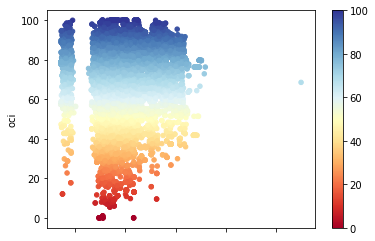

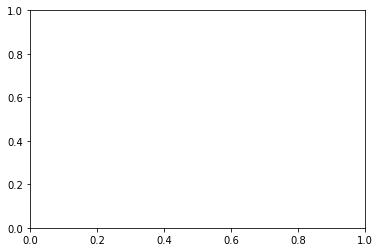

In [159]:
df.plot.scatter('lat', 'oci', c = df.oci, cmap='RdYlBu')

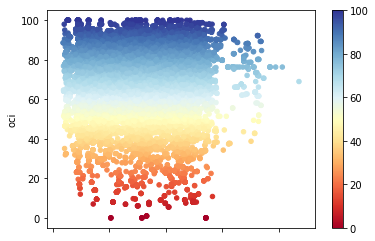

In [156]:
df.plot.scatter('lng', 'oci', c = df.oci, cmap='RdYlBu')

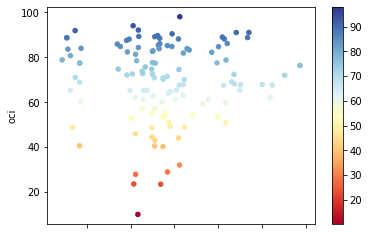

In [164]:
fatal_df = df[(df.killed > 0)]
fatal_df.plot.scatter('lat', 'oci', c = fatal_df.oci, cmap='RdYlBu')

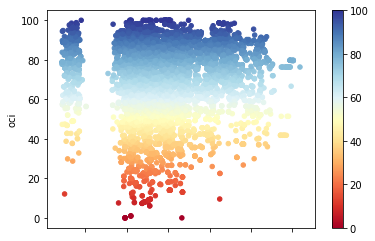

In [166]:
injury_df = df[(df.injured > 0)]
injury_df.plot.scatter('lat', 'oci', c = injury_df.oci, cmap='RdYlBu')